In [106]:
# import data related libraries
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# import modelling libraries, and statistical libraries
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA as ARIMA
from statsmodels import api as sm

In [107]:
df = pd.read_csv("ytcleaned.csv")

In [108]:
df

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Genre
0,0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,False,False,False,People & Blogs
1,1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,False,False,False,Entertainment
2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,False,False,False,Comedy
3,3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,False,False,False,Entertainment
4,4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,False,False,False,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,1685609,38160,1385,2657,False,False,False,Pets & Animals
40945,40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,1064798,60008,382,3936,False,False,False,People & Blogs
40946,40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,1066451,48068,1032,3992,False,False,False,Entertainment
40947,40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,5660813,192957,2846,13088,False,False,False,Film & Animation


In [109]:
df.isnull().sum()

Unnamed: 0                0
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
Genre                     0
dtype: int64

In [110]:
df.dropna(inplace= True)

In [111]:
df.describe()

,Unnamed: 0,category_id,views,likes,dislikes,comment_count
count,40949.000000,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,20474.000000,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,11821.102423,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,0.000000,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10237.000000,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,20474.000000,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,30711.000000,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,40948.000000,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [112]:
df = df.drop(['Unnamed: 0', 'trending_date', 'publish_time'], axis=1)


In [113]:
df

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Genre
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,748374,57527,2966,15954,False,False,False,People & Blogs
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2418783,97185,6146,12703,False,False,False,Entertainment
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,3191434,146033,5339,8181,False,False,False,Comedy
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,343168,10172,666,2146,False,False,False,Entertainment
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2095731,132235,1989,17518,False,False,False,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,The Cat Who Caught the Laser,AaronsAnimals,15,1685609,38160,1385,2657,False,False,False,Pets & Animals
40945,1h7KV2sjUWY,True Facts : Ant Mutualism,zefrank1,22,1064798,60008,382,3936,False,False,False,People & Blogs
40946,D6Oy4LfoqsU,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,1066451,48068,1032,3992,False,False,False,Entertainment
40947,oV0zkMe1K8s,How Black Panther Should Have Ended,How It Should Have Ended,1,5660813,192957,2846,13088,False,False,False,Film & Animation


In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
lb = LabelEncoder()

In [117]:
encoding = df.describe(include='object')

In [118]:
encoding.columns

Index(['video_id', 'title', 'channel_title', 'Genre'], dtype='object')

In [119]:
df['video_id']=lb.fit_transform(df['video_id'])

In [120]:
df['title']=lb.fit_transform(df['title'])

In [121]:
df['channel_title']=lb.fit_transform(df['channel_title'])

In [170]:
df['Genre']=lb.fit_transform(df['Genre'])

In [123]:
df['comments_disabled']=lb.fit_transform(df['comments_disabled'])

In [124]:
df['ratings_disabled']=lb.fit_transform(df['ratings_disabled'])

In [125]:
df['video_error_or_removed']=lb.fit_transform(df['video_error_or_removed'])

In [126]:
df['comments_disabled'].value_counts()

comments_disabled
0    40316
1      633
Name: count, dtype: int64

In [169]:
df

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Genre
0,376,5848,335,22,748374,57527,2966,15954,0,0,0,10
1,256,5420,1008,24,2418783,97185,6146,12703,0,0,0,3
2,696,4360,1499,23,3191434,146033,5339,8181,0,0,0,1
3,5377,3964,706,24,343168,10172,666,2146,0,0,0,3
4,4067,2542,2147,24,2095731,132235,1989,17518,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
40944,1257,5219,35,15,1685609,38160,1385,2657,0,0,0,11
40945,267,5696,2198,22,1064798,60008,382,3936,0,0,0,10
40946,1411,2555,237,24,1066451,48068,1032,3992,0,0,0,3
40947,5222,2321,778,1,5660813,192957,2846,13088,0,0,0,4


In [128]:
df.corr()

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Genre
video_id,1.000000,0.016745,-0.009451,-0.011794,0.033233,0.019219,0.011927,0.009414,-0.015068,-0.007576,0.005690,-0.012724
title,0.016745,1.000000,0.133903,0.023666,-0.030219,-0.028989,0.013757,-0.012184,0.022218,0.010823,-0.020053,0.000541
channel_title,-0.009451,0.133903,1.000000,0.045249,-0.032590,0.001220,-0.001244,0.029223,-0.036127,0.010805,0.010482,-0.066058
category_id,-0.011794,0.023666,0.045249,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011,-0.046457
views,0.033233,-0.030219,-0.032590,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256,0.006187
likes,0.019219,-0.028989,0.001220,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641,0.003896
dislikes,0.011927,0.013757,-0.001244,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853,-0.004691
comment_count,0.009414,-0.012184,0.029223,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725,-0.000589
comments_disabled,-0.015068,0.022218,-0.036127,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970,0.033841
ratings_disabled,-0.007576,0.010823,0.010805,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526,0.020931


<Axes: >

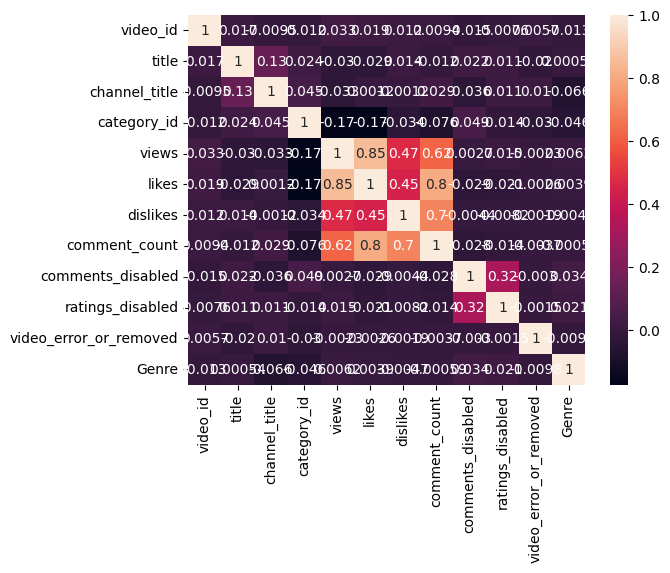

In [129]:
# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Now create the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

In [130]:
df1=df[['views','likes','comment_count','title','category_id','comment_count','comments_disabled','Genre']]

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
ss = StandardScaler()

In [133]:
df1 = ss.fit_transform(df1)

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
y = df['likes']
x = df.drop(['likes'],axis=1)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(df1, y, test_size=0.25)

In [138]:
from sklearn.linear_model import LinearRegression

In [146]:
lr = LinearRegression()

In [147]:
lr.fit(x_train,y_train)

LinearRegression()

In [148]:
y_pred = lr.predict(x_test)

In [149]:
from sklearn.metrics import r2_score

In [150]:
r2_score(y_test,y_pred)

1.0

In [155]:
print(x_test[:5])


[[-0.27011419  0.03768001 -0.07912908  0.82335721 -1.31766916 -0.07912908
  -0.12530348  0.24485661]
 [-0.24264984 -0.30863298 -0.19107128  1.20752531  0.66429904 -0.19107128
  -0.12530348  0.51089267]
 [-0.28258548 -0.31610407 -0.22291737  0.63448348  0.53216783 -0.22291737
  -0.12530348 -0.81928765]
 [ 0.1584825   0.30890647  0.09434126  0.57027711  0.2679054   0.09434126
  -0.12530348  1.04296481]
 [ 0.00603695  0.11715309 -0.07635056 -1.16382989  0.40003662 -0.07635056
  -0.12530348 -1.35135979]]


In [156]:

print(y_test[:5])


34221     82891
17103      3626
18809      1916
30593    144970
26537    101081
Name: likes, dtype: int64


In [151]:
import pickle
with open('model.pickle','wb') as model_file:
    pickle.dump(lr,model_file)

In [168]:
df

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Genre
0,376,5848,335,22,748374,57527,2966,15954,0,0,0,10
1,256,5420,1008,24,2418783,97185,6146,12703,0,0,0,3
2,696,4360,1499,23,3191434,146033,5339,8181,0,0,0,1
3,5377,3964,706,24,343168,10172,666,2146,0,0,0,3
4,4067,2542,2147,24,2095731,132235,1989,17518,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
40944,1257,5219,35,15,1685609,38160,1385,2657,0,0,0,11
40945,267,5696,2198,22,1064798,60008,382,3936,0,0,0,10
40946,1411,2555,237,24,1066451,48068,1032,3992,0,0,0,3
40947,5222,2321,778,1,5660813,192957,2846,13088,0,0,0,4
